## Classification

In [23]:
# Consolidated imports for the notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             precision_recall_curve)

## 5-Digit Detector: Binary Classification with SGD Classifier

### Project Overview

In this project, we'll build a **binary classifier** that detects whether a handwritten digit is a **5 or not-5**. This is a simplified classification problem:
- **Input:** Image of a handwritten digit (0-9)
- **Output:** Is it a 5? (Yes/No)
- **Target:** Accurately identify which images contain the digit 5

---

## What is Binary Classification?

**Binary Classification** = Predicting between **two classes only**.

### Examples:
- Email: **Spam or Not Spam?**
- Medical: **Disease or Healthy?**
- Digit: **Is it a 5 or Not-5?**
- Sentiment: **Positive or Negative review?**

### Our Task:
```
Image Input
    ↓
    ↓ [Model thinks...]
    ↓
Output: "It's a 5!" (Yes = 1)
    or
Output: "It's NOT a 5!" (No = 0)
```

---

## What is SGD Classifier? (Beginner-Friendly)

### SGD = Stochastic Gradient Descent

Let's break this down:

#### **Stochastic** = Random
- Instead of looking at ALL data at once, we look at **a few examples** at a time
- Like studying one page of a book at a time, not all 500 pages together

#### **Gradient** = Direction to Improve
- "How should I adjust myself to get better?"
- Imagine you're hiking in fog trying to find the lowest point
- Gradient tells you: "Go left and down!" or "Go right and up!"

#### **Descent** = Going Down (Getting Better)
- We keep taking small steps to improve our predictions

### How SGD Classifier Works (Simple Analogy)

**Imagine you're learning to throw darts:**

```
Round 1: Throw 5 darts blindly
         Result: 2 hit the target
         Lesson: "Aim more to the RIGHT and UP"

Round 2: Adjust based on feedback, throw 5 darts
         Result: 3 hit the target (better!)
         Lesson: "Still need more adjustment..."

Round 3: Adjust again, throw 5 darts
         Result: 4 hit the target (even better!)
         Lesson: "Getting close..."

...keep improving...

Round 100: Throw 5 darts
           Result: 5 hit the target (perfect!)
```

### Step-by-Step Process

```
1. Start with random guess
   ↓
2. Look at a few training examples
   ↓
3. Check: "How many did I get wrong?"
   ↓
4. Adjust my strategy slightly (gradient descent)
   ↓
5. Repeat with next batch of examples
   ↓
6. After seeing all data multiple times → Good model!
```

---

## Key Advantages of SGD Classifier

| Feature | Benefit |
|---------|---------|
| **Fast** | Doesn't need all data at once (processes in batches) |
| **Memory Efficient** | Works with large datasets (big data) |
| **Online Learning** | Can learn from new data continuously |
| **Simple** | Easy to understand and implement |

---

## When to Use SGD Classifier

✅ **Good for:**
- Large datasets (millions of rows)
- Binary classification problems
- Need fast training
- Online learning scenarios

❌ **Not ideal for:**
- Very small datasets (< 1000 samples)
- Complex non-linear patterns (use neural networks instead)
- When you need probability estimates

---

## Our 5-Digit Detector Strategy

1. **Prepare data:** Load handwritten digit images (0-9)
2. **Create target:** Mark 5s as "1" (Yes), everything else as "0" (No)
3. **Split data:** Training set and test set
4. **Train SGD Classifier:** Let it learn to recognize 5s
5. **Evaluate:** Check accuracy on test data
6. **Tune:** Adjust parameters if needed

---

### Quick Summary

- **SGD Classifier** = Fast learner that improves by looking at small batches
- **Binary Classifier** = Answers yes/no questions
- **Our task** = Detect digit 5 vs not-5 using SGD
- **Why SGD?** = Fast, memory-efficient, perfect for this task!

---

## MNIST Dataset: Handwritten Digits

### What is MNIST?

**MNIST** = Modified National Institute of Standards and Technology

It's the **most famous beginner dataset** in machine learning for digit recognition.

### What Does It Contain?

```
70,000 handwritten digit images (0-9)
├── 60,000 for training
└── 10,000 for testing

Each image is:
- 28 × 28 pixels
- Grayscale (black and white)
- Already labeled (we know what digit it is)
```

### Example Images

```
┌─────────────────────────┐
│ 0      1      2      3  │
│ ┌──┐  ┌──┐  ┌──┐  ┌──┐ │
│ │  │  │ │  │──┐   └─┐ │
│ │  │  │ │  │  │    ┌─┘ │
│ └──┘  └─┘  └──┘   └──  │
├─────────────────────────┤
│ 4      5      6      7  │
│ ┌─ ┐  ┌──┐  ┌──┐  ──── │
│ ├──┤  └─┐ │  │    ┐   │
│ │  │    │ │  │    │   │
│ └──┘  ──┘ │  └──  │   │
├─────────────────────────┤
│ 8      9               │
│ ┌──┐  ┌──┐             │
│ │  │  └─┐│             │
│ │  │    ││             │
│ └──┘  ──┘│             │
└─────────────────────────┘
```

### How the Data is Stored

Each image is **flattened** into a vector of 784 values (28 × 28):

```
Original Image (28×28)          Flattened Vector (784 values)
┌──────────┐                    [0, 10, 25, 30, ..., 15, 5, 0]
│ ████     │                    
│ █  █     │  ────→   Each pixel value is 0-255
│ ████     │          0 = white (background)
│ █  █     │          255 = black (digit)
└──────────┘
```

---

### Why MNIST is Perfect for This Project

✅ **Large enough:** 60,000 training samples (plenty to learn from)
✅ **Simple:** Just digit images (easy to understand)
✅ **Well-structured:** Already split into train/test
✅ **Canonical:** Used by ML researchers for 30+ years
✅ **Real-world:** Based on actual handwritten digits from postal codes

---

### Our Task with MNIST

Instead of solving all 10 digits (0-9), we simplify:

```
MNIST Dataset (70,000 images of 0-9)
           ↓
      We transform to:
           ↓
Binary Classification
  5 → Label "1" (Is 5)
  0-4, 6-9 → Label "0" (Not 5)
           ↓
Input: Any handwritten digit image
Output: "Is this a 5?" (Yes/No)

In [ ]:
#Load mnist dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
X.shape
#X will be the 70000 images and y will be the labels for those images. X will have 784 features, which are the pixel values of the images. 
# Each image is 28x28 pixels, so 28*28 = 784.

(70000, 784)

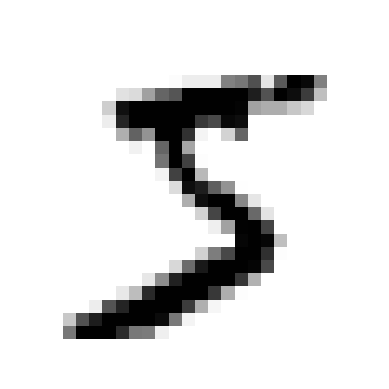

'5'

In [ ]:
#Vizualize the first image in the dataset
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.axis("off")
plt.show()
y[0]

In [4]:
#Dividing the data into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#Now we will create a binary classifier to detect the number 5. So we will create a new target vector where the value is True if the original target value is 5 
#and False otherwise.
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
sgd_clf = SGDClassifier(random_state=42)#Initializing the SGDClassifier with a random state of 42 for reproducibility. 
                                        #This means that the results will be the same every time we run the code.
sgd_clf.fit(X_train, y_train_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
#Perfomance metrics
cross_val_score(sgd_clf, X_test, y_test_5,cv=3, scoring="accuracy")

array([0.94691062, 0.95439544, 0.96879688])

## Performance Metrics: Understanding Accuracy and Its Limitations

### What is Accuracy?

**Accuracy** = Percentage of correct predictions

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

### Example:

```
Made 100 predictions:
- 95 correct
- 5 wrong

Accuracy = 95/100 = 95%
```

---

## The Problem: Why Accuracy Can Be Misleading

### The Class Imbalance Problem

**Accuracy fails when classes are imbalanced** (one class is much more common than the other).

### Real Example: Our 5-Digit Detector

In MNIST dataset, the distribution is:

```
Total digits in test set: 10,000

Digit distribution:
├── 0: ~980 images
├── 1: ~1,135 images
├── 2: ~1,032 images
├── 3: ~1,010 images
├── 4: ~982 images
├── 5: ~892 images  ← Only 8.9% are 5s!
├── 6: ~958 images
├── 7: ~1,028 images
├── 8: ~974 images
└── 9: ~1,009 images

Ratio: ~89% NOT-5, ~11% ARE-5
```

### The Trap: Dummy Classifier

Now imagine we create a **stupid model** that ALWAYS predicts "NOT-5":

```python
class DummyClassifier:
    def predict(self, X):
        return [False] * len(X)  # Always say "it's not a 5"
```

**What happens?**

```
Test set: 10,000 images
- True 5s: ~1,000 images
- True NOT-5s: ~9,000 images

Dummy classifier predictions:
- Predicts "NOT-5" for all 10,000 images
- Gets 9,000 correct (the actual NOT-5s)
- Gets 1,000 wrong (the actual 5s)

Accuracy = 9,000 / 10,000 = 90%
```

### The Problem

```
⚠️ Our "stupid" classifier that learns NOTHING gets 90% accuracy!

This is USELESS because:
- It never identifies a single 5
- But accuracy says it's 90% correct
- We're fooled into thinking it's a good model
```

---

## Visual Comparison

### Good Accuracy, Bad Classifier

```
Dummy Model (always predicts NOT-5):
- Accuracy: 90% ✓ (looks good!)
- BUT: Identifies 0 out of 892 actual 5s (useless!)

Real SGD Model:
- Accuracy: 96% ✓✓ (even better!)
- AND: Identifies 850 out of 892 actual 5s (actually useful!)
```

---

## When Accuracy is Misleading

✅ **Accuracy works well when:**
- Classes are balanced (50% each)
- False positives and false negatives have equal cost

❌ **Accuracy is misleading when:**
- **Class imbalance** (90% vs 10%) ← Our case!
- **Different costs** - One error type is worse than the other
  - Medical: Missing a disease (false negative) is worse than false alarm
  - Spam: Blocking good email (false positive) is worse than missing spam

---

## Better Metrics for Imbalanced Classification

Instead of accuracy, use:

| Metric | What It Measures | Use When |
|--------|------------------|----------|
| **Precision** | Of predicted 5s, how many are actually 5s? | Want few false alarms |
| **Recall** | Of actual 5s, how many did we find? | Want to catch all 5s |
| **F1-Score** | Balance between precision and recall | Need both |
| **ROC-AUC** | Trade-off between true positive and false positive rates | Want overall balance |
| **Confusion Matrix** | Detailed breakdown of all prediction types | Understand all errors |

---

## Example: Precision vs Recall

For our 5-detector:

```
Made 1000 predictions of "IS-5":
├── 850 were actually 5s (True Positive)
└── 150 were NOT 5s (False Positive)

Precision = 850 / 1000 = 85%
"Of my 5-predictions, 85% were correct"

In test set, there were 892 actual 5s:
├── 850 we found (True Positive)
└── 42 we missed (False Negative)

Recall = 850 / 892 = 95%
"Of all actual 5s, I found 95%"
```

### Key Difference

```
High Precision, Low Recall:
"I'm very confident when I predict 5,
 but I miss many actual 5s"

Low Precision, High Recall:
"I find most 5s,
 but I also incorrectly predict many NOT-5s as 5s"
```

---

## Summary

- **Accuracy = % Correct** (simple but often misleading)
- **With imbalanced data:** A dummy classifier can get high accuracy without learning anything
- **Our 5-detector:** 89% of data is NOT-5, so 90% accuracy means nothing
- **Better approach:** Use precision, recall, F1-score, or confusion matrix
- **Rule of thumb:** Always check the class distribution first!

## Performance Metrics: Confusion Matrix, Precision and Recall

In [ ]:
#Get predicted values for each test fold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_scores

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [ ]:
# Confusion matrix of 5-detector
confusion_matrix(y_train_5, y_scores)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# Get Precision Score of 5-detector
score_precision =precision_score(y_train_5, y_scores)
print("Precision Score: " + str(score_precision))
# Get Recall Score of 5-detector
score_recall = recall_score(y_train_5, y_scores)
print("Recall Score: " + str(score_recall))

Precision Score: 0.8370879772350012
Recall Score: 0.6511713705958311


So our model is 83% precise and recall is 65%.
Instead of calculating precision and recall every time we can get the f1 score. F1 score is high when both precison and recall are almost similar.

In [ ]:
# Get f1 score of 5-detector
score_f1 = f1_score(y_train_5, y_scores)
print("F1 Score: " + str(score_f1))

F1 Score: 0.7325171197343847


In [26]:
#Calculating the decision function score for the SGDClassifier
y_score_some_digit = sgd_clf.decision_function([some_digit])
y_score_some_digit
#This score is the distance of the sample from the decision boundary. 
# The higher the score, the more confident the model is that the sample belongs to the positive class (in this case, 5).

array([2164.22030239])

In [27]:
threshold = 0
y_some_digit_pred = (y_score_some_digit > threshold)
y_some_digit_pred
#By default, the threshold is set to 0, which means that if the score is greater than 0, 
# the model will predict that the sample belongs to the positive class (5).

array([ True])

In [28]:
#By setting a higher threshold, we are making the model more conservative in its predictions.
threshold = 8000
y_some_digit_pred = (y_score_some_digit > threshold)
y_some_digit_pred


array([False])

In [ ]:
#get scores for all instances in the training set using cross_val_predict()
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,
y_scores)
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ], shape=(60001,)),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00], shape=(60001,)),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905],
       shape=(60000,)))

In [20]:
#Plotting precision/ recall curve using Scikit-Learn
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

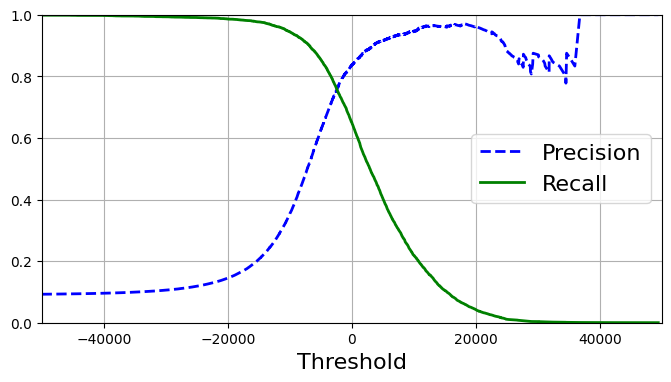

In [21]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
#Suppose we want to set the threshold to get a precision of 90%. 
# We can find the threshold that gives us a precision of 90% .
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
print( "Precision:", precision_score(y_train_5, y_train_pred_90))
print( "Recall:", recall_score(y_train_5, y_train_pred_90))    

Precision: 0.9000345901072293
Recall: 0.4799852425751706


## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
fpr, tpr, thresholds
#As threshold goes down, the false positive increase.

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ], shape=(3908,)),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00], shape=(3908,)),
 array([             inf,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174],
       shape=(3908,)))

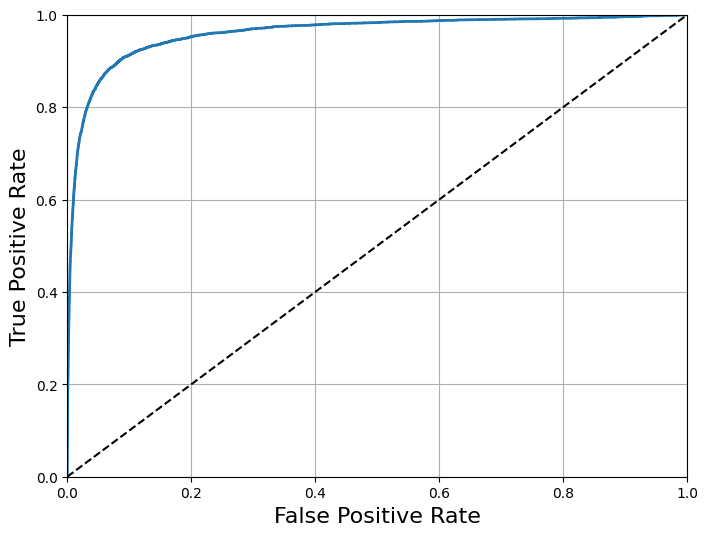

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
#Compute AUC (Area Under the Curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9604938554008616